#Lab 1: Understanding Keras Deep Learning Library and Implementing a Simple NeuralNetwork for Handwritten Digit Recognition using Keras#



Date: 27 September 2023


Problem Description: Using Keras build a Neural Network model and train it using MNIST dataset for doing Handwritten Digit Recognition.
Finally evaluate the performnance of the model on Test Dataset provided in MNIST

Step 1 - Setting up Keras and Numpy & Loading of MNIST dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

Step 2 - Have a look at the data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
print(train_labels)

[5 0 4 ... 5 6 8]


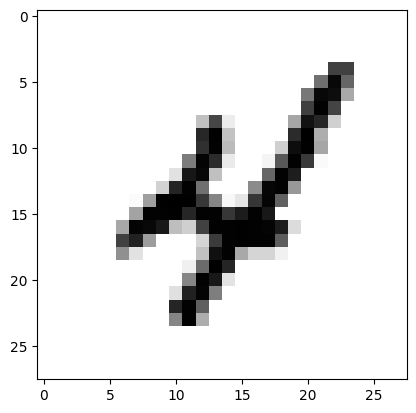

The image is of:  4


In [ ]:
#plot sample image from dataset
digit = train_images[9]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print("The image is of: ",train_labels[9])

Step 3 - Building the layered Neural Network Model for Handwritten Digit Recognition

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

Step 4 -Compiling the Neural Network Model

In [ ]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Step 5 - Input Data Preparation or Pre-Processing

In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

print(train_labels[15])
print(test_labels[15])

7
5


In [ ]:
from keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

print(train_labels[15])
print(test_labels[15])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Step 6 - Ready to train the network.

In [ ]:
network.fit(train_images, train_labels, epochs = 5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2657 - accuracy: 0.9230
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1064 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0708 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0518 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0385 - accuracy: 0.9889


Step 7 - Evaluating the Performance of our Trained NN Model on Test Data

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Accuracy', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9765
Test Accuracy 0.9764999747276306


Step 8 - The Final Step - Using the Trained and Tested Model to do actual work of Prediction

In [ ]:
network.predict(test_images[2:3])

1/1 [==============================] - 0s 49ms/step


array([[1.7246172e-07, 9.9943465e-01, 6.7098219e-05, 2.7175661e-06,
        5.2490799e-05, 4.1399971e-06, 9.1766628e-07, 1.6501462e-04,
        2.7194276e-04, 8.2326329e-07]], dtype=float32)

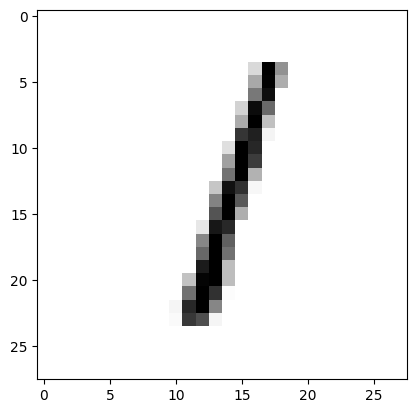

In [ ]:
test_images_copy = test_images.reshape((10000,28,28))
digit = test_images_copy[2]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()